# Building CNN -Convolutional Neural Network

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import keras

In [46]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [47]:
(X_train.shape),(y_train.shape)

((60000, 28, 28), (60000,))

In [48]:
(X_test.shape),(y_test.shape)

((10000, 28, 28), (10000,))

In [49]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [50]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Show Image

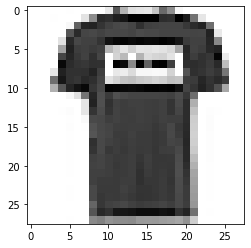

In [51]:
plt.imshow(X_train[1],cmap='Greys')

In [52]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [53]:
X_train.shape

(60000, 28, 28, 1)

## Feature Scaling

In [54]:
X_train = X_train/255
X_test = X_test/255

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [56]:
(X_train.shape) , (y_train.shape) 

((48000, 28, 28, 1), (48000,))

In [57]:
(X_val.shape) , (y_val.shape) 

((12000, 28, 28, 1), (12000,))

## Convolution Neural Network- Model Building

In [58]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1, 1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax'),
])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [61]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 1s 8ms/step - loss: 0.6436 - accuracy: 0.7827 - val_loss: 0.4420 - val_accuracy: 0.8407
Epoch 2/10
94/94 [==============================] - 1s 6ms/step - loss: 0.3883 - accuracy: 0.8638 - val_loss: 0.3804 - val_accuracy: 0.8704
Epoch 3/10
94/94 [==============================] - 1s 6ms/step - loss: 0.3445 - accuracy: 0.8787 - val_loss: 0.3482 - val_accuracy: 0.8782
Epoch 4/10
94/94 [==============================] - 1s 6ms/step - loss: 0.3105 - accuracy: 0.8905 - val_loss: 0.3259 - val_accuracy: 0.8876
Epoch 5/10
94/94 [==============================] - 1s 6ms/step - loss: 0.2920 - accuracy: 0.8963 - val_loss: 0.3098 - val_accuracy: 0.8931
Epoch 6/10
94/94 [==============================] - 1s 6ms/step - loss: 0.2710 - accuracy: 0.9041 - val_loss: 0.3364 - val_accuracy: 0.8803
Epoch 7/10
94/94 [==============================] - 1s 6ms/step - loss: 0.2575 - accuracy: 0.9082 - val_loss: 0.2892 - val_accuracy: 0.9003
Epoch 8/10
94/94 [==

In [62]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [63]:
y_test[0]

9

In [64]:
y_pred  = model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.2 , 0.08, 0.01]], dtype=float32)

In [65]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2771 - accuracy: 0.9000


[0.27710288763046265, 0.8999999761581421]

## Visualize Output

## Confusion Matrix

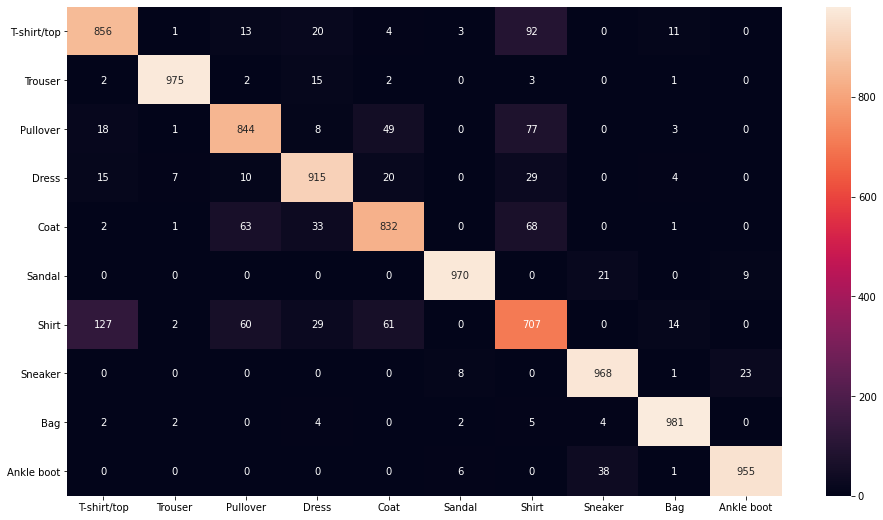

In [66]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label)  for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

#show cm
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

In [67]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.84      0.85      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.86      0.83      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.72      0.71      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Convolutional Neural Network - Building Complex Model

In [68]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [70]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0907 - accuracy: 0.9655 - val_loss: 0.3344 - val_accuracy: 0.9113
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0821 - accuracy: 0.9698 - val_loss: 0.3698 - val_accuracy: 0.9093
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0840 - accuracy: 0.9684 - val_loss: 0.3675 - val_accuracy: 0.9097
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0818 - accuracy: 0.9694 - val_loss: 0.3683 - val_accuracy: 0.9082
Epoch 5/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0778 - accuracy: 0.9710 - val_loss: 0.3689 - val_accuracy: 0.9081
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0770 - accuracy: 0.9717 - val_loss: 0.3535 - val_accuracy: 0.9101
Epoch 7/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0742 - accuracy: 0.9720 - val_loss: 0.3746 - val_accuracy: 0.9097
Epoch 8/50
94/94 [==

In [73]:
cnn_model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.9082


[0.5063205361366272, 0.9082000255584717]

In [72]:
y_pred_2  = cnn_model2.predict(X_test).round(2)
y_pred_2

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.13, 0.  , 0.  ]], dtype=float32)